In [152]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import tensorflow as tf
tf.__version__

'1.14.1'

In [2]:
import os
import matplotlib.pyplot as plt
import json
import math

In [155]:
split = 'val'

In [208]:
split = 'train'

In [4]:
split = 'test'

In [153]:
output_dir = "eraserbenchmark/outputs/lambda_sweep/"
img_dir = 'graphics/'
color = {'accuracy': 'r', 'sufficiency': 'g', 'comprehensiveness': 'b', 'auprc':'y'}

In [209]:
dataset = 'movies'

In [216]:
dataset = 'fever'

In [201]:
dataset = 'multirc'

In [194]:
structure = 'gru'

In [217]:
structure = 'rnr'

In [218]:
if structure == 'gru':
    par_lambdas = [0.1, 0.2, 0.5, 1., 2., 5., 10., 20., 50., 100., 200., 500.]
elif structure == 'rnr':
    par_lambdas = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1., 2., 5.]

if dataset == 'movies':
    baseline = {'accuracy': 0.974, 'sufficiency':  0.035, 'comprehensiveness': 0.113,
                'auprc':  0.467, "iou_f1": 0.124, 'token_f1': 0.322}
    train_on_portion = 0
elif dataset == 'fever':
    baseline = {'accuracy': 0.850, 'sufficiency':  0.077, 'comprehensiveness': 0.070,
                'auprc':  0.617, "iou_f1": 0.817, 'token_f1': 0.796}
    train_on_portion = 0.1
elif dataset == 'multirc':
    baseline = {'accuracy': 0.655,
            'sufficiency': 0.079,
            'comprehensiveness': 0.164,
            'auprc': 0.240,
            'iou_f1': 0.419,
            "token_f1": 0.456}
    train_on_portion = 0.4
results_dirs = [output_dir + f"bert_base_seqlen_512_{dataset}_exp_output_{structure}_merged_evidences{'_train_on_portion_'+str(train_on_portion) if train_on_portion != 0 else ''}_par_lambda_{par_lambda}_no_padding_imbalanced_bce_resampling_pooling_first_learning_rate_1e-05__{split}.txt" for par_lambda in par_lambdas]

In [219]:
for results_dir in results_dirs:
    if not os.path.isfile(results_dir):
        print(results_dir)

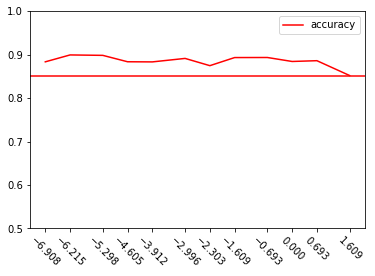

In [220]:
metrics = ['accuracy']

results = []
y = {metric:[] for metric in metrics}
for results_dir in results_dirs:
    if os.path.isfile(results_dir):
        with open(results_dir, 'r') as fin:
            r = eval(fin.read()[1:-1])
        results.append(r)
        for metric in metrics:
            y[metric].append(r['classification_scores'][metric])
    else:
        for metric in metrics:
            y[metric].append(0)
            
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
for metric in metrics:
    plt.axhline(y=baseline[metric], color=color[metric], linestyle='-')
    ax.plot([math.log(i) for i in par_lambdas], y[metric], label=metric, color=color[metric])
plt.ylim([0.5, 1])
ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_accuracy.png')

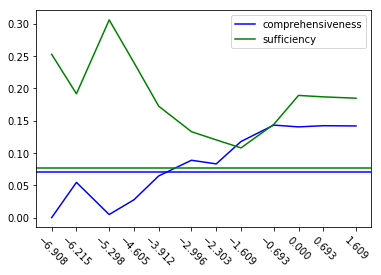

In [221]:
metrics = ["comprehensiveness", 'sufficiency']

results = []
y = {metric:[] for metric in metrics}
for results_dir in results_dirs:
    if os.path.isfile(results_dir):
        with open(results_dir, 'r') as fin:
            r = eval(fin.read()[1:-1])
        results.append(r)
        for metric in metrics:
            y[metric].append(r['classification_scores'][metric])
    else:
        for metric in metrics:
            y[metric].append(0)
            
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
for metric in metrics:
    plt.axhline(y=baseline[metric], color=color[metric], linestyle='-')
    ax.plot([math.log(i) for i in par_lambdas], y[metric], label=metric, color=color[metric])
ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_cs.png')

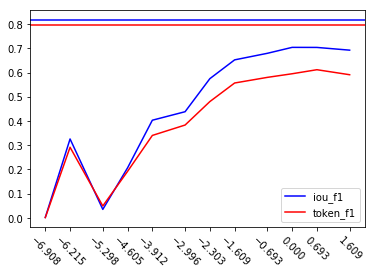

In [222]:
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
plt.axhline(y=baseline['iou_f1'], color='b', linestyle='-')
ax.plot([math.log(i) for i in par_lambdas], [results[i]['iou_scores'][0]['macro']['f1']
                                             for i in range(len(par_lambdas))], label='iou_f1', color='b')
plt.axhline(y=baseline['token_f1'], color='r', linestyle='-')
ax.plot([math.log(i) for i in par_lambdas], [results[i]['token_prf']['instance_micro']['f1']
                                             for i in range(len(par_lambdas))], label='token_f1', color='r')

ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_iou_token_f1.png')

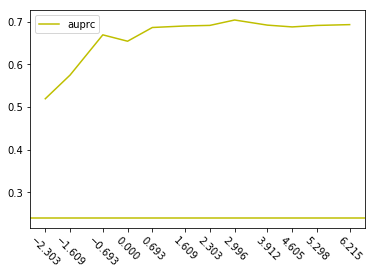

In [200]:
metrics = ['auprc']

rs = []
y = {metric:[] for metric in metrics}
for results_dir in results_dirs:
    if os.path.isfile(results_dir):
        with open(results_dir, 'r') as fin:
            r = fin.read()
            r = eval(r[1:-1])
        rs.append(r)
        for metric in metrics:
            y[metric].append(r['token_soft_metrics'][metric])
    else:
        for metric in metrics:
            y[metric].append(0)
            
fig, ax = plt.subplots()
plt.xticks([math.log(i) for i in par_lambdas], rotation=-45)
for metric in metrics:
    plt.axhline(y=baseline[metric], color=color[metric], linestyle='-')
    ax.plot([math.log(i) for i in par_lambdas], y[metric], label=metric, color=color[metric])
#plt.ylim([0.5, 1])
ax.legend()
plt.savefig(img_dir + f'{dataset}_{split}_train_on_portion_{train_on_portion}_accuracy.png')

In [208]:
list(zip(par_lambdas, [math.log(i) for i in par_lambdas]))

[(0.001, -6.907755278982137),
 (0.002, -6.214608098422191),
 (0.005, -5.298317366548036),
 (0.01, -4.605170185988091),
 (0.02, -3.912023005428146),
 (0.05, -2.995732273553991),
 (0.1, -2.3025850929940455),
 (0.2, -1.6094379124341003),
 (0.5, -0.6931471805599453),
 (1.0, 0.0),
 (2.0, 0.6931471805599453),
 (5.0, 1.6094379124341003)]